In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasetwork2/dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/datasetwork2/dataset.csv")
df.head()
#прочитаем данные и посмотрим из чего они состоят

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()
#основная информация по каждой фиче
# у нас 5 категориальных фич: track_id, artists, album_name, track_name, track_genre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
#в данных 3 Null значения, проверим, возможно это принадлежит одной строчке,
df[df.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [5]:
#так и есть, такие данные нам ничего не дадут, поэтому можем смело удалить эту строку

In [6]:
df = df.dropna()

In [7]:
#следующим шагом удалим заведомо ненужные фичи, как track_id и Unnamed 0, идентификаторы при EDA информации не дадут

In [8]:
df = df.drop(['track_id', 'Unnamed: 0'], axis=1)

In [9]:
#начал последовательно рассматривать каждую фичу по отдельности и в связи с другими

In [10]:
#начнем по порядку album_name,
# album_name - название альбома, которому принадлежит песня
#посмотрим сколько уникальных альбомов у нас в данных
print(len(df['album_name'].unique()))


46589


In [11]:
#теперь посмотрим количество треков в каждом альбоме
albums = df.groupby("album_name")['track_name'].count().reset_index().sort_values(by="track_name", ascending=False)

In [12]:
albums

,album_name,track_name
2597,Alternative Christmas 2022,195
13332,Feliz Cumpleaños con Perreo,184
23976,Metal,143
15904,Halloween con perreito,123
15892,Halloween Party 2022,115
...,...,...
19507,"Just for Laughs: The Archives, Vol. 19",1
19506,"Just for Laughs: The Archives, 46",1
19505,"Just for Laughs - The Archives, Vol. 8",1
19504,"Just for Laughs - The Archives, Vol. 73",1


In [13]:
#ответим на такой вопрос, сколько, в среднем, треков записано в альбомах в представленных данных
albums.agg({"track_name" : "mean"})



track_name    2.446908
dtype: float64

In [14]:
#в среднем в большинстве альбомов песен от 2 до 3

In [15]:
#чтобы убедиться в прошлой идее, посмотрим процент альбомов, в которых меньше 4 песен, 
albums[albums["track_name"] > 4].count()
print(100 - albums[albums["track_name"] > 4].count() / albums.count() * 100)# 90% альбомов - <4 песен

album_name    90.793964
track_name    90.793964
dtype: float64


In [16]:
#итого около 90% альбомов содержат небольшое количество песен

In [17]:
#дальше попробуем исследовать популярность в зависимости от album_name
#рассчитаем среднюю популярность альбома(по всем песням в нем)
albums_popularity = df.groupby('album_name')['popularity'].mean().reset_index()
album_info = pd.merge(albums, albums_popularity, on='album_name')

In [18]:
album_info

,album_name,track_name,popularity
0,Alternative Christmas 2022,195,0.000000
1,Feliz Cumpleaños con Perreo,184,1.913043
2,Metal,143,0.000000
3,Halloween con perreito,123,0.000000
4,Halloween Party 2022,115,0.330435
...,...,...,...
46584,"Just for Laughs: The Archives, Vol. 19",1,21.000000
46585,"Just for Laughs: The Archives, 46",1,22.000000
46586,"Just for Laughs - The Archives, Vol. 8",1,22.000000
46587,"Just for Laughs - The Archives, Vol. 73",1,21.000000


In [19]:
#отсортируем по размеру альбома
album_info_sorted = album_info.sort_values(by='track_name', ascending=False)



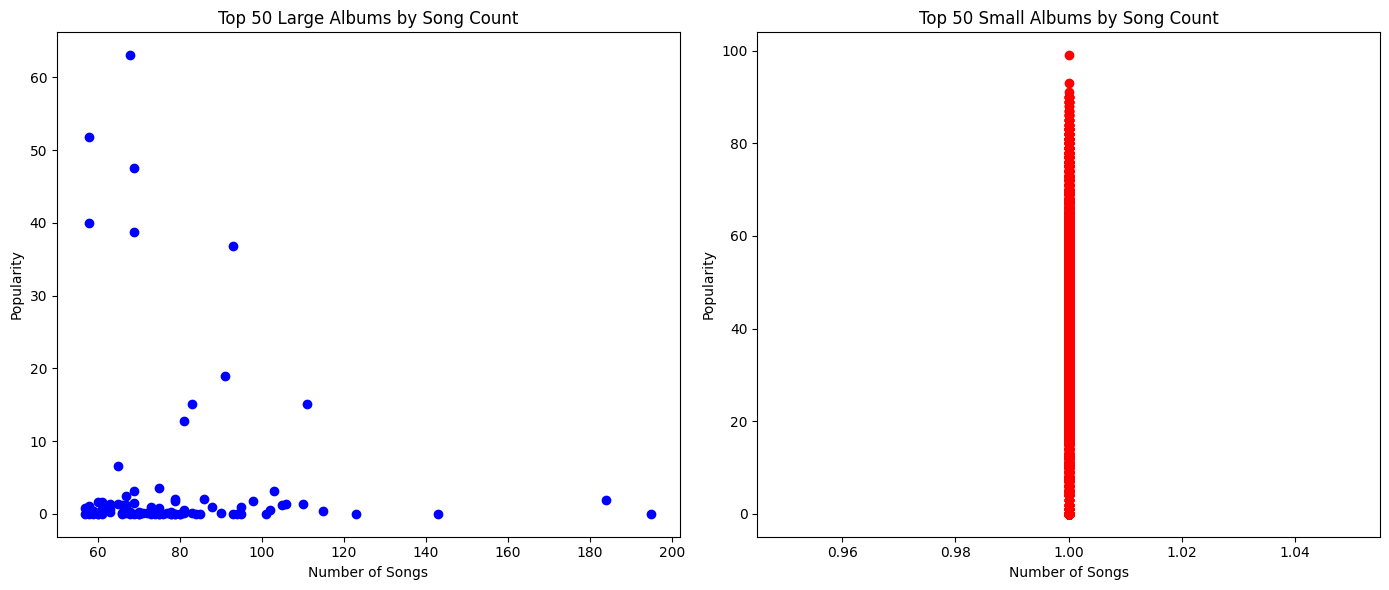

In [20]:
import matplotlib.pyplot as plt
#выведем популярность 50 самых больших альбомов и 50 самых маленьких, поскольку данных достаточно много, и если рассматривать все, то это не даст информации
top_50_large = album_info_sorted.head(100)
top_50_small = album_info_sorted.tail(20000)

# Строим графики для больших и маленьких альбомов
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График для 50 альбомов с наибольшим количеством песен
axes[0].scatter(top_50_large['track_name'], top_50_large['popularity'], color='blue')
axes[0].set_title('Top 50 Large Albums by Song Count')
axes[0].set_xlabel('Number of Songs')
axes[0].set_ylabel('Popularity')

# График для 50 альбомов с наименьшим количеством песен
axes[1].scatter(top_50_small['track_name'], top_50_small['popularity'], color='red')
axes[1].set_title('Top 50 Small Albums by Song Count')
axes[1].set_xlabel('Number of Songs')
axes[1].set_ylabel('Popularity')

# Показываем графики
plt.tight_layout()
plt.show()

In [21]:
#выводы по графикам можно сделать следующие: большинство "больших" альбомов не популярно, есть несколько выбросов, но средняя популярность на нуле. про маленькие альбомы информацию получить адекватную не удалось, поскольку слишком большой разброс по альбомам

In [22]:
#исследуем следующую переменную artists - наименование исполнителя(соло/группа)
#для начала посмотрим информацию о количестве треков по каждому исполнителю
song_count = df.groupby('artists')['track_name'].count().reset_index().sort_values(by='track_name', ascending=False)
song_count

,artists,track_name
26983,The Beatles,279
10418,George Jones,271
26009,Stevie Wonder,236
16049,Linkin Park,224
8587,Ella Fitzgerald,222
...,...,...
19111,Mother Love Bone,1
8053,DubVision;Afrojack,1
8051,Dub Pistols;Too Many T's,1
19114,Mothership,1


In [23]:
#самым крупным исполнителем оказались Beatles с 279 треком, и достаточно много артистов, у которых представлена только одна песня

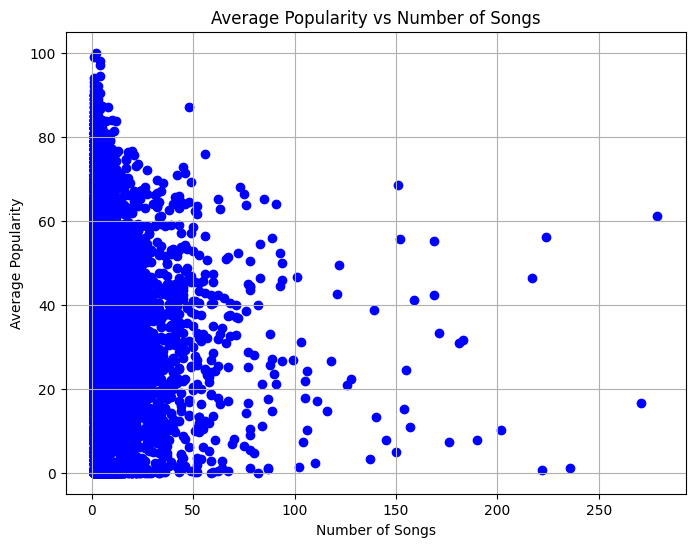

In [24]:
#следующим графиком хочу посмотреть, влияет ли количество песен у исполнителя на популярность
popularity = df.groupby('artists')['popularity'].mean().reset_index()
#добавим среднюю популярность артиста, в зависимости от его песен
artist_info = pd.merge(song_count, popularity, on='artists')
plt.figure(figsize=(8, 6))
plt.scatter(artist_info['track_name'], artist_info['popularity'], color='blue')

# Настроим график
plt.title('Average Popularity vs Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Average Popularity')
plt.grid(True)

# Показываем график
plt.show()


In [25]:
#я получил противоречивые данные, которые не помогли сформировать какого либо вывода

In [26]:
#посмотрим теперь рейтинг самых популярных артистов. 
sorted_artists = artist_info.sort_values(by='popularity', ascending=False)
sorted_artists

,artists,track_name,popularity
11637,Sam Smith;Kim Petras,2,100.0
14789,Bizarrap;Quevedo,1,99.0
4958,Manuel Turizo,4,98.0
6145,Bad Bunny;Chencho Corleone,4,97.0
6142,Bad Bunny;Bomba Estéreo,4,94.5
...,...,...,...
5322,Michael Nyman;Michael Nyman Band,4,0.0
5318,Hadi Bastani,4,0.0
23191,Konstantin Pluzhnikov,1,0.0
5299,PERMEATE,4,0.0


In [27]:
#видим по графику, что данные неоднозначны, есть артисты с высокой популярностью, и небольшим количеством песен, и то же самое наоборот, есть много артистов с нулевой популярностью

In [28]:
#дальше я исследовал зависимость между тем, сколько каждый трек написало артистов(посколько их может быть несколько)
artist_count_per_track = df.groupby('track_name')['artists'].nunique().reset_index().sort_values(by='artists', ascending=False)
print(artist_count_per_track)

              track_name  artists
25803               Home       24
44446           Paradise       22
3159               Alone       21
66770        Without You       18
29048              Intro       18
...                  ...      ...
25379  High Hopes - Live        1
25380         High Horse        1
25381          High Life        1
25382     High Like This        1
73607            행복하길 바래        1

[73608 rows x 2 columns]


In [29]:
# я получил информацию о том, что есть некоторые треки, у которых много авторов, например Home, у которого 24

In [30]:
#я решил узнать с чем это связано, возможно просто дело в том, что названия треков совпали у разных групп
df[df["track_name"] == "Home"]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
524,Gabrielle Aplin,English Rain,Home,51,249386,False,0.403,0.2900,2,-10.262,1,0.0328,0.75700,0.000000,0.0972,0.2480,139.482,4,acoustic
4921,Dustin O'Halloran,The Beauty Inside (Original Film Score),Home,53,160812,False,0.327,0.0733,9,-20.667,0,0.0400,0.94600,0.913000,0.3390,0.0384,137.139,4,ambient
13674,Robert Hood,Internal Empire,Home,8,451533,False,0.615,0.8960,11,-13.426,0,0.0542,0.01400,0.888000,0.1480,0.3600,137.675,4,chicago-house
15699,Tenno,Mind Temple,Home,60,179000,False,0.617,0.3520,10,-15.745,0,0.0348,0.62200,0.834000,0.1860,0.1840,120.024,4,chill
19157,Blake Shelton,Cuddle Up Christmas,Home,2,230453,False,0.579,0.4430,7,-6.972,1,0.0255,0.47900,0.000003,0.1100,0.2880,127.814,4,country
19162,Blake Shelton;Michael Bublé,Country Christmas Time,Home,1,227040,False,0.576,0.4560,7,-7.583,1,0.0267,0.58400,0.000027,0.0912,0.2100,127.854,4,country
19163,Blake Shelton;Michael Bublé,Country Holiday,Home,0,227040,False,0.576,0.4560,7,-7.583,1,0.0267,0.58400,0.000027,0.0912,0.2100,127.854,4,country
19169,Blake Shelton;Michael Bublé,Happy Country Christmas,Home,0,227040,False,0.576,0.4560,7,-7.583,1,0.0267,0.58400,0.000027,0.0912,0.2100,127.854,4,country
21243,Yemi Alade,Africa Rising Vol.4,Home,0,224000,False,0.555,0.8200,7,-2.663,1,0.0782,0.12100,0.000004,0.1290,0.9680,113.000,4,dancehall
24525,Robert Hood,Internal Empire,Home,8,451533,False,0.615,0.8960,11,-13.426,0,0.0542,0.01400,0.888000,0.1480,0.3600,137.675,4,detroit-techno


In [31]:
#и моя гипотеза подтвердилась, действительно, это просто одинаковые названия разных треков

In [32]:
#тогда я решил пойти другим путем, исследовать количество создателей именно альбомов, ведь тут уже меньше вероятность, что совпали названия
artist_count_per_track_album = df.groupby(['track_name', 'album_name'])['artists'].nunique().reset_index().sort_values(by='artists', ascending=False)

# Печать результата
print(artist_count_per_track_album)

                       track_name  \
53590                    Paradise   
80512                 Without You   
50472                        Numb   
9934                      Breathe   
81467                         You   
...                           ...   
29536      Hay cosas inolvidables   
29535  Hay Unos Ojos - Remastered   
29534               Hay Unos Ojos   
29533     Hay Un Tren A Las Cinco   
88182                     행복하길 바래   

                                         album_name  artists  
53590                                      Paradise       10  
80512                                   Without You        9  
50472                                          Numb        8  
9934                                        Breathe        8  
81467                                           You        7  
...                                             ...      ...  
29536                          Serie Diamante (USA)        1  
29535                      Viva México (Remastered)

In [33]:
#мы получили уже более понятные результаты, которые используем для сравнения с популярностью

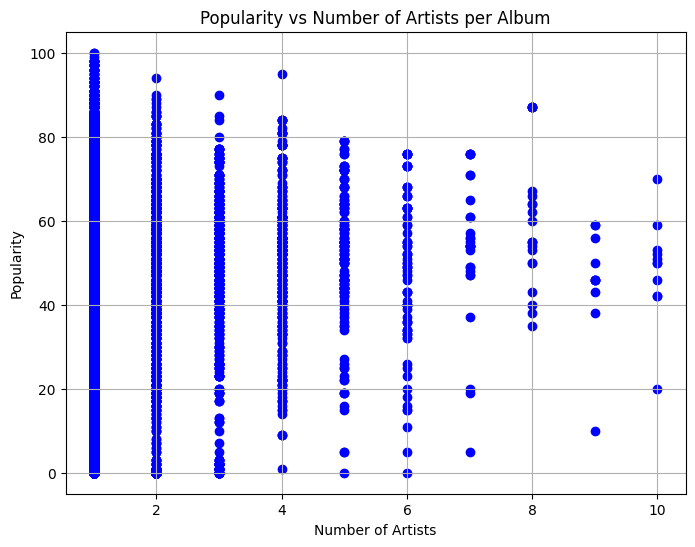

In [34]:
#посмотрим как предыдущий параметр, выведенный нами влияет на популярность
artist_popularity = pd.merge(artist_count_per_track_album, df[['track_name', 'album_name', 'popularity']], 
                             on=['track_name', 'album_name'], how='left')
plt.figure(figsize=(8, 6))
plt.scatter(artist_popularity['artists'], artist_popularity['popularity'], color='blue')

# Настроим график
plt.title('Popularity vs Number of Artists per Album')
plt.xlabel('Number of Artists')
plt.ylabel('Popularity')
plt.grid(True)

# Показываем график
plt.show()

In [35]:
#и опять график нам не дал достаточно много информации, но в целом, у групп, в которых 1-3 в составе больше вероятность сделать вирусную песню

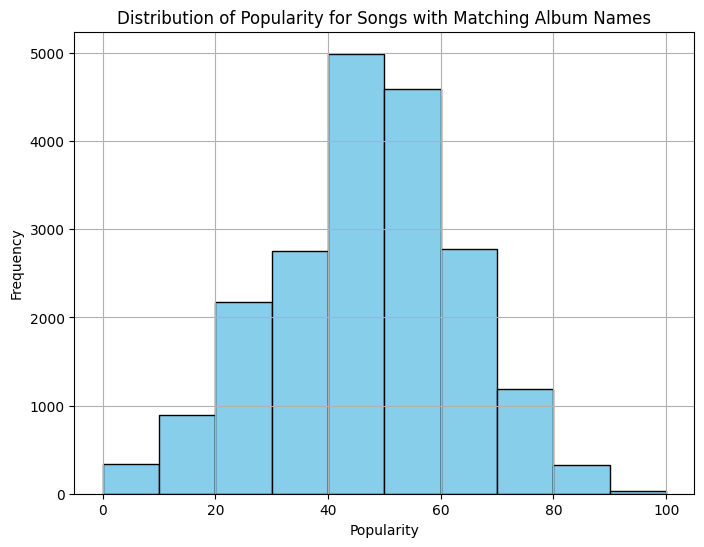

In [36]:
#дальше рассмотрим следующую гипотезу: популярность у тех треков выше, у которых название совпадает с названием альбома
matching_tracks = df[df['track_name'] == df['album_name']]

# Построим график распределения популярности этих песен
plt.figure(figsize=(8, 6))
plt.hist(matching_tracks['popularity'], bins=10, color='skyblue', edgecolor='black')

# Настроим график
plt.title('Distribution of Popularity for Songs with Matching Album Names')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)

# Показываем график
plt.show()

In [37]:
#больше всего оказалось таких треков с популярностью 40-60, что действительно неплохие показатели

In [38]:
#дальше я рассматриваю фичу duration - продолжительность песни
#во первых, продолжительность в миллисекундах, это не очень удобно для анализа, преобразуем в читаемый формат данных
import datetime
df['duration_readable'] = df['duration_ms'].apply(lambda x: str(datetime.timedelta(milliseconds=x)))
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_readable
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0:03:50.666000
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0:02:29.610000
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0:03:30.826000
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0:03:21.933000
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0:03:18.853000


In [39]:
#далее я хотел посмотреть какие нибудь аномально большие треки
df.sort_values(by="duration_readable", ascending=False)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_readable
73617,Tale Of Us,Unity (Voyage Mix),Unity (Voyage Mix) Pt. 1,35,5237295,False,0.695,0.7360,5,-11.371,0,0.0374,0.00399,0.860,0.0910,0.0509,124.001,4,minimal-techno,1:27:17.295000
10984,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,Crossing Wires 002 - Continuous DJ Mix,11,4789026,False,0.697,0.6320,1,-12.469,1,0.0451,0.00815,0.871,0.0998,0.1510,121.055,4,breakbeat,1:19:49.026000
10935,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,Crossing Wires 002 - Continuous DJ Mix,11,4789026,False,0.697,0.6320,1,-12.469,1,0.0451,0.00815,0.871,0.0998,0.1510,121.055,4,breakbeat,1:19:49.026000
24348,Seth Troxler,Seth Troxler - The Lab 03,The Lab 03 - Continuous DJ Mix Part 1,8,4730302,False,0.684,0.6560,5,-11.163,0,0.0633,0.01910,0.848,0.1030,0.3010,123.180,4,detroit-techno,1:18:50.302000
73840,Loco Dice,Amnesia Ibiza - Underground 10,Amnesia Ibiza Underground 10 DJ Mix,17,4563897,False,0.783,0.7280,10,-10.176,0,0.0612,0.00158,0.840,0.1580,0.1890,125.044,4,minimal-techno,1:16:03.897000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39233,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.98500,0.921,0.1640,0.9120,89.032,1,german,0:00:17.826000
16856,Wolfgang Amadeus Mozart;Ingrid Haebler,Mozart: The Complete Piano Sonatas,"Andante in C Major, K. 1a",0,17453,False,0.467,0.0301,2,-28.518,0,0.0428,0.99500,0.900,0.1240,0.0000,84.375,4,classical,0:00:17.453000
59775,Leila Bela;Leila's Opera Class,Angra Manyu,Screams for a Finale! (feat. Leila's Opera Class),0,15800,False,0.251,0.5080,5,-10.564,0,0.3160,0.96900,0.999,0.9520,0.0000,184.051,3,iranian,0:00:15.800000
59812,Leila Bela,Angra Manyu,V-4,0,13386,False,0.000,0.2240,11,-22.196,1,0.0000,0.97000,0.000,0.9070,0.0000,0.000,0,iranian,0:00:13.386000


In [40]:
#есть некоторые треки, которые идут 1 час 30 мин, возможно это просто опера, или мюзикл

In [41]:
#дальше я хотел показать среднюю статистику
average_popularity = df['popularity'].mean()
average_duration_ms = df['duration_ms'].mean()

# Преобразуем среднее время в читаемый формат
average_duration_readable = str(datetime.timedelta(milliseconds=average_duration_ms))

# Вывод результатов
print(f"Средняя популярность: {average_popularity}")
print(f"Среднее время в миллисекундах: {average_duration_ms}")
print(f"Среднее время в читаемом формате: {average_duration_readable}")

Средняя популярность: 33.23882665637418
Среднее время в миллисекундах: 228031.15338731042
Среднее время в читаемом формате: 0:03:48.031153


In [42]:
#наиболее популярные песни в среднем длятся около 3 минут 48 сек

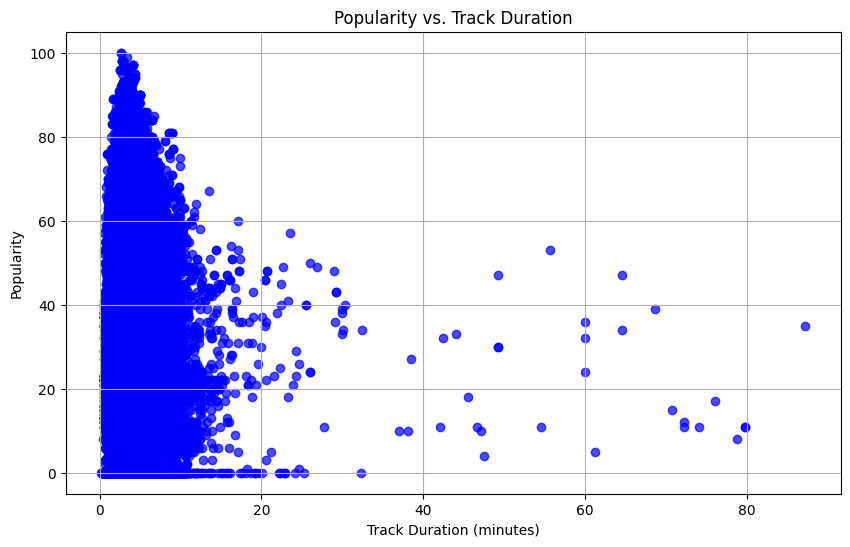

In [43]:
#на этом графике я попытался найти зависимость между популярностью и продолжительностью трека
df['duration_min'] = df['duration_ms'] / (1000 * 60)

# Построим график
plt.figure(figsize=(10, 6))
plt.scatter(df['duration_min'], df['popularity'], color='blue', alpha=0.7)

# Настроим график
plt.title('Popularity vs. Track Duration')
plt.xlabel('Track Duration (minutes)')
plt.ylabel('Popularity')
plt.grid(True)

# Показываем график
plt.show()

In [44]:
#разброс данных достаточно большой, но вывод такой, длинные трэки менее популярны нежели среднестатистические

In [45]:
#рассмотрим теперь фичу explicit - наличие взрослого контента
df.groupby("explicit")["popularity"].mean()

explicit
False    32.938207
True     36.454191
Name: popularity, dtype: float64

In [46]:
#как показывает статистика более популярны песни с "взрослым контентом"

In [47]:
#убрал отработанную переменную, чтобы не мешалась
df = df.drop(['duration_ms'], axis=1)

In [48]:
#преобразуем переменную в числовой формат 0 1
df['explicit'] = df['explicit'].astype(int)

In [49]:
df.head()

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_readable,duration_min
0,Gen Hoshino,Comedy,Comedy,73,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0:03:50.666000,3.844433
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0:02:29.610000,2.493500
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0:03:30.826000,3.513767
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0:03:21.933000,3.365550
4,Chord Overstreet,Hold On,Hold On,82,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0:03:18.853000,3.314217


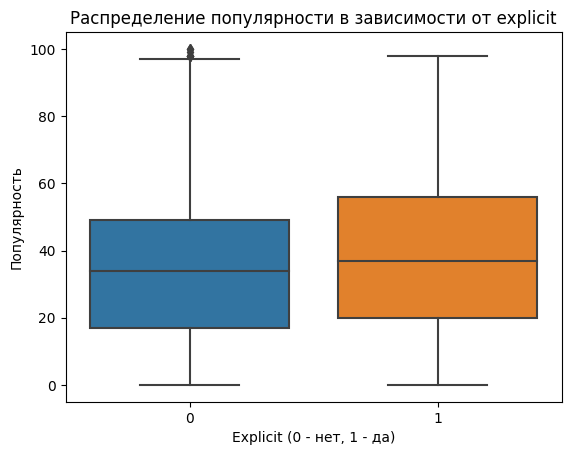

In [50]:
#на графике я решил проверить гипотезу, что песни с нецензурным контентом более популярны
import seaborn as sns
sns.boxplot(data=df, x='explicit', y='popularity')
plt.title('Распределение популярности в зависимости от explicit')
plt.xlabel('Explicit (0 - нет, 1 - да)')
plt.ylabel('Популярность')
plt.show()

In [51]:
#график показывает что 18+ песни действительно имеют большую популярность

In [52]:
#чтобы точно убедиться в этом, попробовал провести t-тест
from scipy.stats import ttest_ind

# Разделим данные на группы
group_0 = df[df['explicit'] == 0]['popularity']
group_1 = df[df['explicit'] == 1]['popularity']

# Выполним t-тест
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)  # equal_var=False для учета возможной разницы дисперсий

# Вывод результатов
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

# Интерпретация
if p_value < 0.05:
    print("Есть статистически значимая разница в популярности между группами.")
else:
    print("Нет статистически значимой разницы в популярности между группами.")

t-statistic: -13.754
p-value: 0.000
Есть статистически значимая разница в популярности между группами.


In [53]:
#в результате статистически значимая разница между ними есть

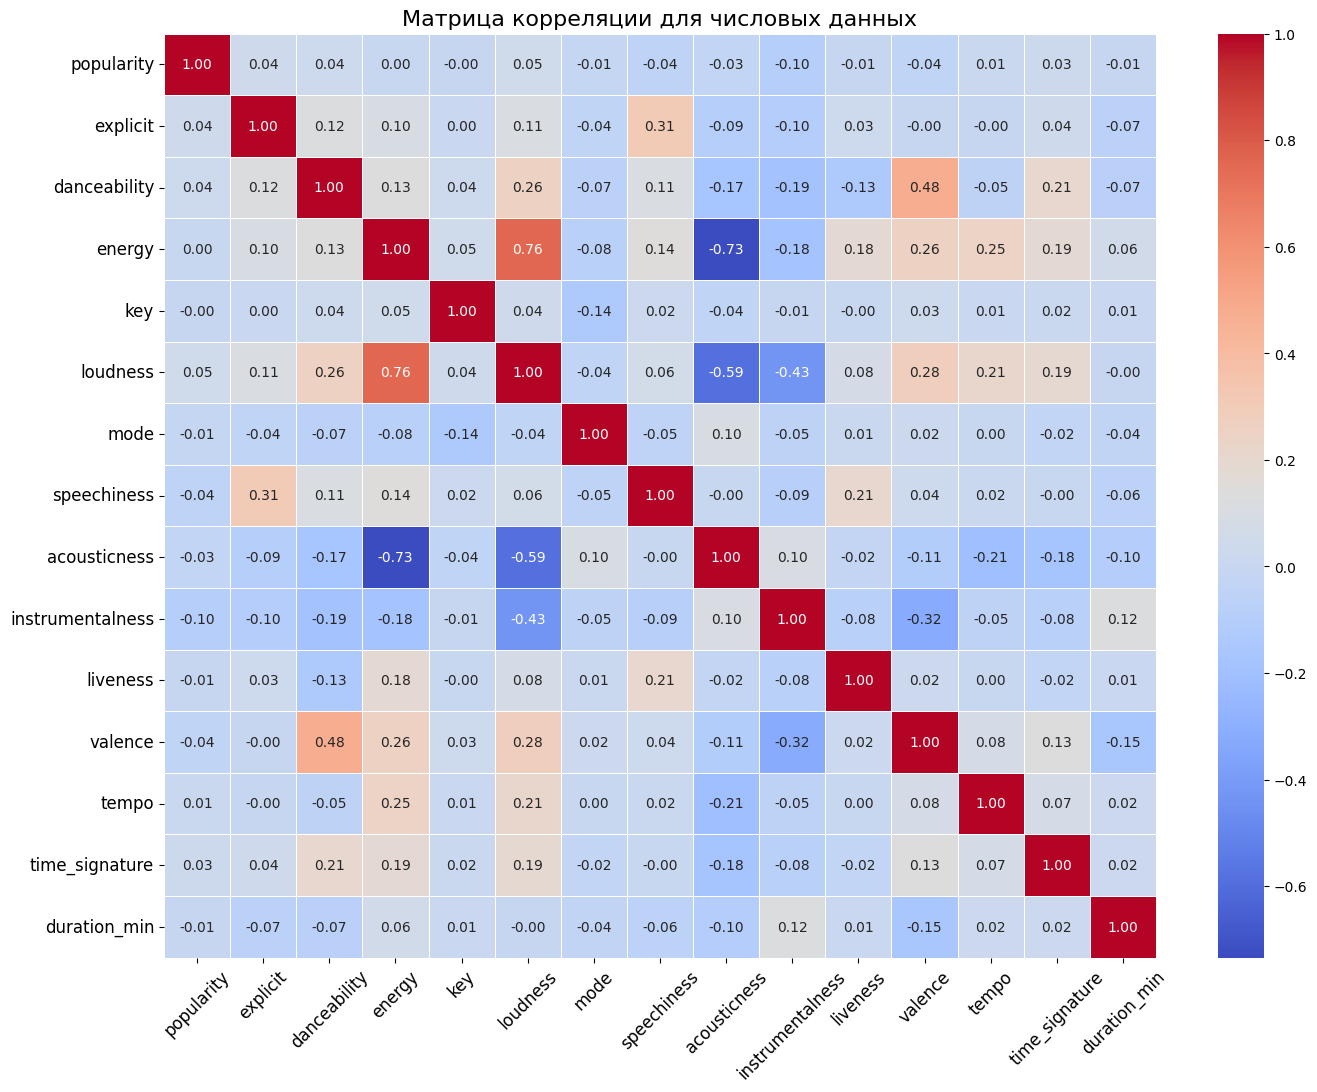

In [54]:
#дальше, для того, чтобы разобраться, как работать с оставшимися фичами, я построил матрицу корреляции
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 12))  # Увеличиваем размеры графика
sns.heatmap(
    correlation_matrix,
    annot=True,  # Показываем значения корреляции
    cmap='coolwarm',
    fmt='.2f',  # Формат значений
    linewidths=0.5,  # Толщина линий между ячейками
    annot_kws={"size": 10}  # Размер шрифта для аннотаций
)
plt.xticks(fontsize=12, rotation=45)  # Увеличиваем шрифт и добавляем наклон к меткам
plt.yticks(fontsize=12, rotation=0)   # Увеличиваем шрифт для оси Y
plt.title('Матрица корреляции для числовых данных', fontsize=16)  # Заголовок крупнее
plt.show()

In [55]:
#по матрице корреляции я получил следующие выводы:
#1) больше всего с популярностью связана громкость(шумность) песни, чем более громкая песня тем выше популярность
#2) также я увидел в данных и другие, более сильные зависимости:
#   1. explicit высоко коррелирует с speechiness, это обьяснить не трудно, ведь в основном в рэпе(которым являетсяя критерий speechiness - скорость зачитки) присутствует почти везде explicit content
#   2. danceability коррелирует с valence, то есть танцевальные песни более жизнерадостные(имеют более высокий эмоциональный тон)
#   3. energy коррелирует с loudness и acousticness, чем выше loudness тем выше энергичность, что в целом закономерно, и песни написанные на акустике, более медленные и спокойные, что соответствует обратной зависимости с energy
# можно сделать общий вывод такой, оставшиеся фичи напрямую на популярность не влияют, а вот друг на друга местами очень сильно, поэтому дальше рассмотрим их взаимосвязи

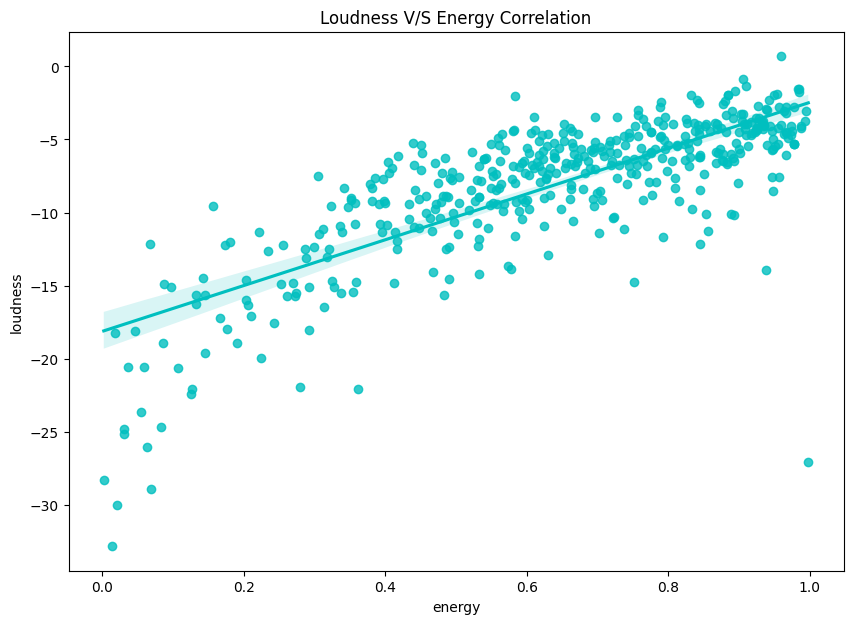

In [56]:
#рассмотрим взаимосвязь energy и loudness
sample_tracks=df.sample(int(0.004*len(df)))
plt.figure(figsize=(10,7))
sns.regplot(data=sample_tracks, y='loudness', x='energy', color='c')
plt.title('Loudness V/S Energy Correlation');



In [57]:
#как видим гипотеза оправдалась, чем выше энергичность, тем выше шумность песни

In [58]:
#посмотрим danceability трэков и посмотрим топ 10 треков по этому показателю
highest_danceability = df['danceability'].max()
highest_danceability = round(highest_danceability,2)
print('The highest danceability of the tracks is {}.'.format(highest_danceability))

top_10_tracks_highest_danceability = df.sort_values(['danceability'],ascending=False)[['track_name','danceability', 'popularity']].head(10)
top_10_tracks_highest_danceability

The highest danceability of the tracks is 0.98.


,track_name,danceability,popularity
111635,Sol Clap,0.985,19
66576,Medicaid Baby,0.984,10
24916,Inspiration,0.983,5
73374,Daily Routines,0.982,49
13353,Bitches,0.981,10
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",0.981,7
94006,Dancing in My Room,0.980,74
13145,Plastik Fantastik,0.980,13
14119,The Soccer Song (Football Song),0.979,49
13039,The Underground - Hatiras Remix,0.979,0


In [59]:
top_10_tracks_highest_danceability["popularity"].mean()
#у черезчур танцевальных треков в среднем низкая популярность, скорее всего из за того, что они играются в основном только в клубах

23.6

In [60]:
#отдельно теперь еще поизучаем loudness,
lowest_loudness = df['loudness'].min()
lowest_loudness = round(lowest_loudness,2)
print('самый тихий трек {}.'.format(lowest_loudness))

top_10_tracks_lowest_loudness = df.sort_values(['loudness'],ascending=True)[['track_name','loudness', 'popularity']].head(10)
top_10_tracks_lowest_loudness

самый тихий трек -49.53.


,track_name,loudness,popularity
101888,Soothing White Noise - Loopable With No Fade,-49.531,32
101538,White Noise - Loopable With No Fade,-49.307,37
101722,Ceiling Fan Sound on Low Power,-46.591,34
101360,Cricket Sound 4 - Loopable With No Fade,-46.251,54
79719,Chaconne in sol maggiore : Variazione 9,-43.957,58
101972,Nap in the Afternoon Box Fan,-43.943,32
101968,Loopable Woods,-43.714,32
101476,Sleep Sound For Babies - Underwater,-43.504,36
79591,Wake with me,-43.303,60
101397,Clean White Noise - Loopable With No Fade - Wh...,-43.046,39


In [61]:
#средняя популярность у "тихих" треков
top_10_tracks_lowest_loudness["popularity"].mean()

41.4

In [62]:
df

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_readable,duration_min
0,Gen Hoshino,Comedy,Comedy,73,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0:03:50.666000,3.844433
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0:02:29.610000,2.493500
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0:03:30.826000,3.513767
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0:03:21.933000,3.365550
4,Chord Overstreet,Hold On,Hold On,82,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0:03:18.853000,3.314217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,0:06:24.999000,6.416650
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,0:06:25,6.416667
113997,Cesária Evora,Best Of,Miss Perfumado,22,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,0:04:31.466000,4.524433
113998,Michael W. Smith,Change Your World,Friends,41,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,0:04:43.893000,4.731550


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


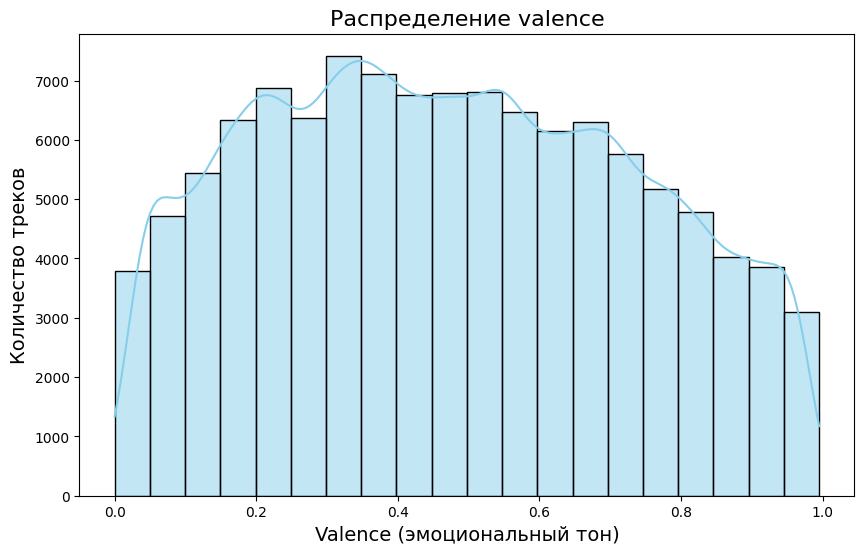

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['valence'], bins=20, kde=True, color='skyblue')
plt.title('Распределение valence', fontsize=16)
plt.xlabel('Valence (эмоциональный тон)', fontsize=14)
plt.ylabel('Количество треков', fontsize=14)
plt.show()
#в серии слежующих графиков я начинаю изучать влияние valence(эмоциональный тон) на ее популярность, на первом графике я посмотрел распределение valence по количеству треков

In [64]:
#вывод, у среднего эмоционального тона больше всего треков(что в целом обьяснимо)

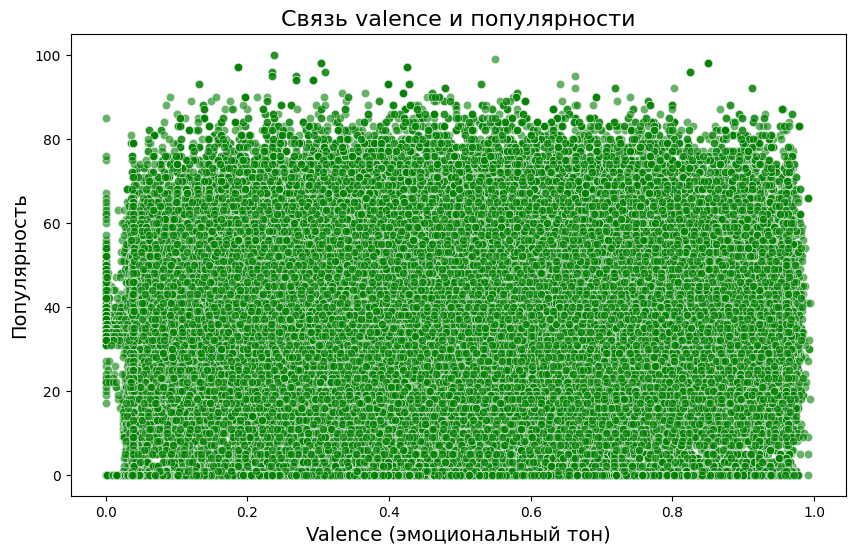

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='valence', y='popularity', alpha=0.6, color='green')
plt.title('Связь valence и популярности', fontsize=16)
plt.xlabel('Valence (эмоциональный тон)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.show()
#дальше я попытался изучить напрямую связь valence и популярности

In [66]:
#так как данных достаточно много, этот график мне не принес никаких результатов, нужно было придумать что нибудь, чтобы сделать его более информативным

/tmp/ipykernel_17/4268544788.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('valence_bin')['popularity'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


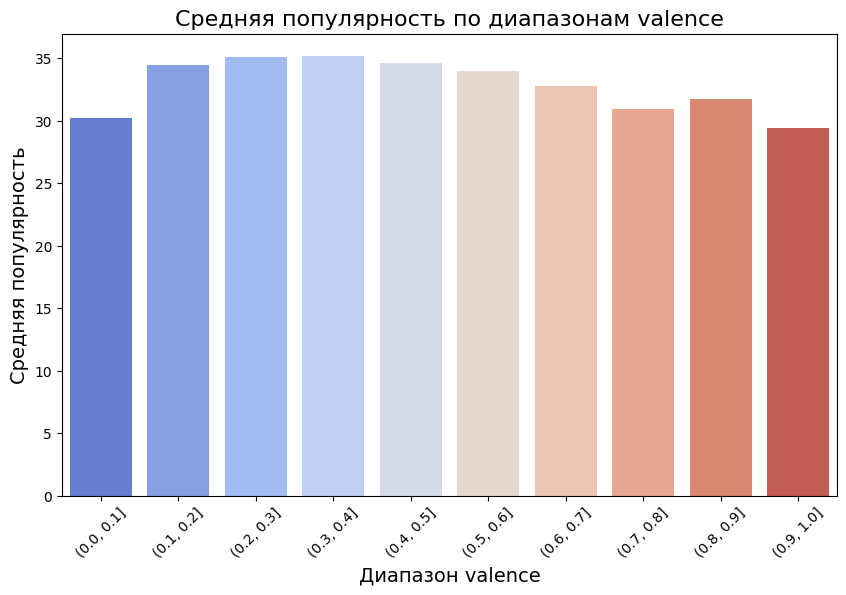

In [67]:
df['valence_bin'] = pd.cut(df['valence'], bins=np.linspace(0, 1, 11))  # 10 групп
grouped = df.groupby('valence_bin')['popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='valence_bin', y='popularity', palette='coolwarm')
plt.title('Средняя популярность по диапазонам valence', fontsize=16)
plt.xlabel('Диапазон valence', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=45)
plt.show()
#поэтому я разбил valence по диапазонам и посмотрел среднюю популярность по каждому

In [68]:
#в целом по графику можно сделать вывод, что наиболее популярны песни со средним эмоциональным тоном

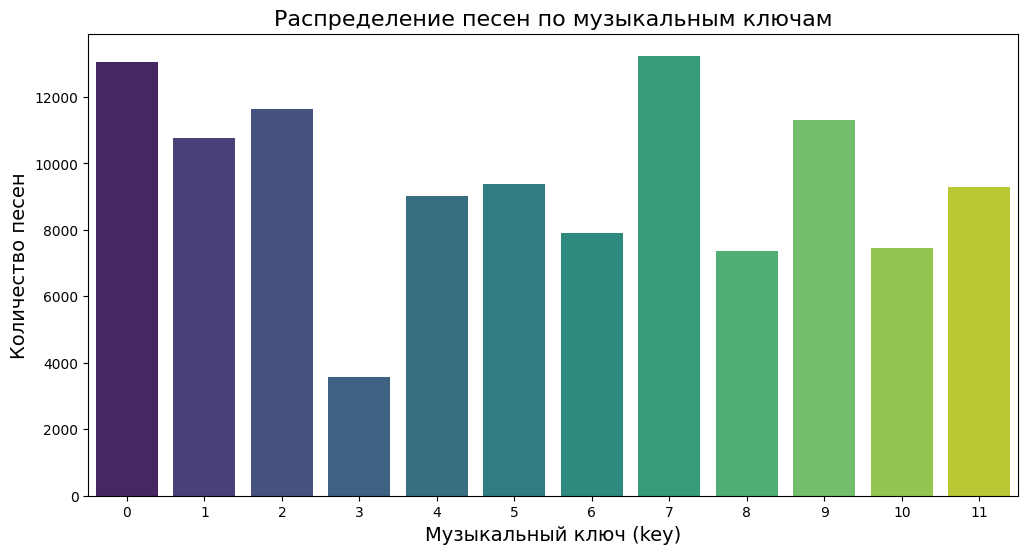

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='key', palette='viridis')
plt.title('Распределение песен по музыкальным ключам', fontsize=16)
plt.xlabel('Музыкальный ключ (key)', fontsize=14)
plt.ylabel('Количество песен', fontsize=14)
plt.show()
#посмотрим сколько в среднем песен в зависимости от музыкального ключа, в каком те написаны

In [70]:
#вывод: как показал график, больше всего песен было написано в 0 или 7 ключе

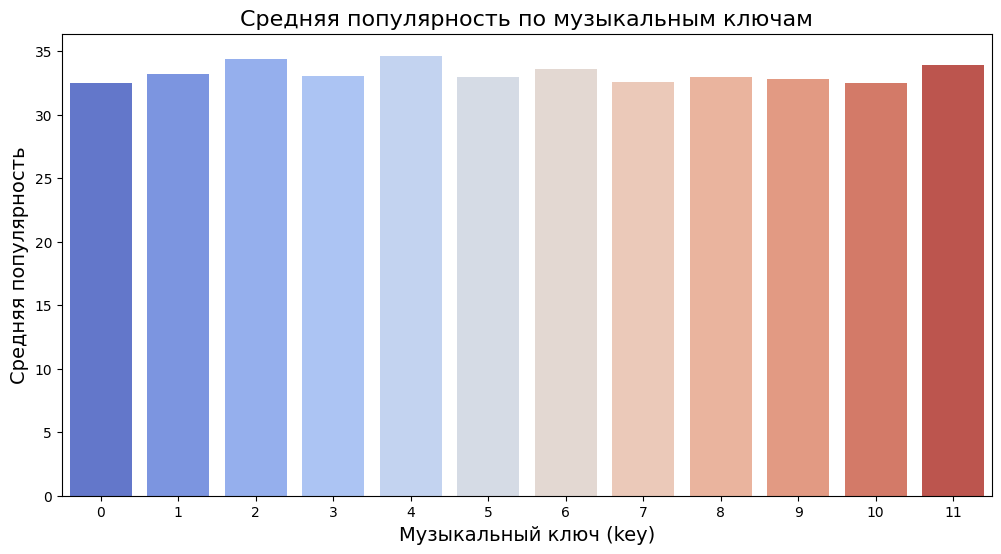

In [71]:
plt.figure(figsize=(12, 6))
key_popularity = df.groupby('key')['popularity'].mean().reset_index()
sns.barplot(data=key_popularity, x='key', y='popularity', palette='coolwarm')
plt.title('Средняя популярность по музыкальным ключам', fontsize=16)
plt.xlabel('Музыкальный ключ (key)', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.show()
#попробуем предположить, что возможно музыкальный ключ в котором написана песня, каким-то образом влияет на ее популярность

In [72]:
#и гипотеза не оправдалась, в целом особо взаимосвязи между этими данными не наблюдается, в целом практически равномерное распределение

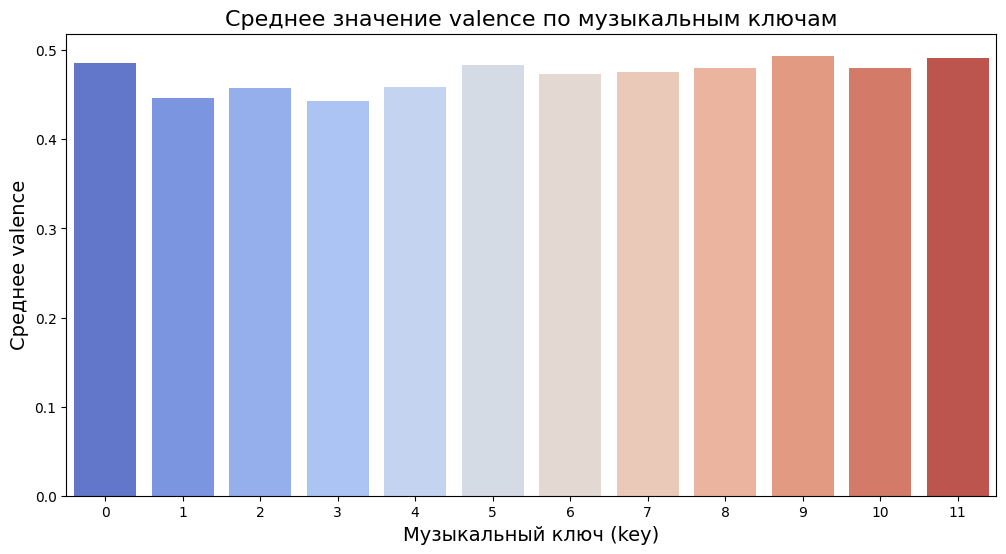

In [73]:
plt.figure(figsize=(12, 6))
key_valence = df.groupby('key')['valence'].mean().reset_index()
sns.barplot(data=key_valence, x='key', y='valence', palette='coolwarm')
plt.title('Среднее значение valence по музыкальным ключам', fontsize=16)
plt.xlabel('Музыкальный ключ (key)', fontsize=14)
plt.ylabel('Среднее valence', fontsize=14)
plt.show()
#в следующем график я решил проверить гипотезу того, что музыкальный ключ, в котором написана песня влияет на значение valence(жизнерадостности)

In [74]:
#по графику получил, что в среднем чуть более жизнерадостные песни(а возможно и более популярные) написаны в 0 и 11 ключе

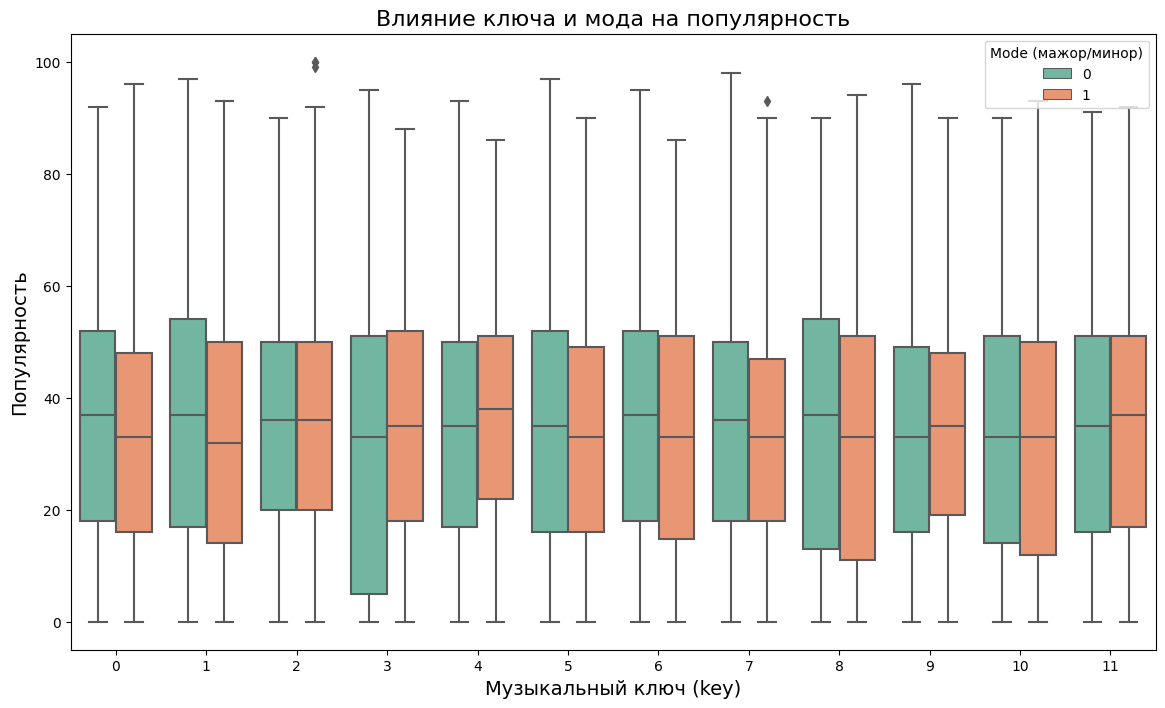

In [75]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='key', y='popularity', hue='mode', palette='Set2')
plt.title('Влияние ключа и мода на популярность', fontsize=16)
plt.xlabel('Музыкальный ключ (key)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.legend(title='Mode (мажор/минор)', loc='upper right')
plt.show()
#в следующем графике проверю гипотезу того, влияет ли то, в какой тональности написана данная музыка(мажорная или минорная) и в каком музыкальном ключе, на ее популярность

In [76]:
#как видно по графику мы получили практически равномерное распределение по графику. и вследствие этого можно судить, что тоналость и музыкальный ключ, особо не влияют на популярность песни, она в среднем около 40 в каждому случае

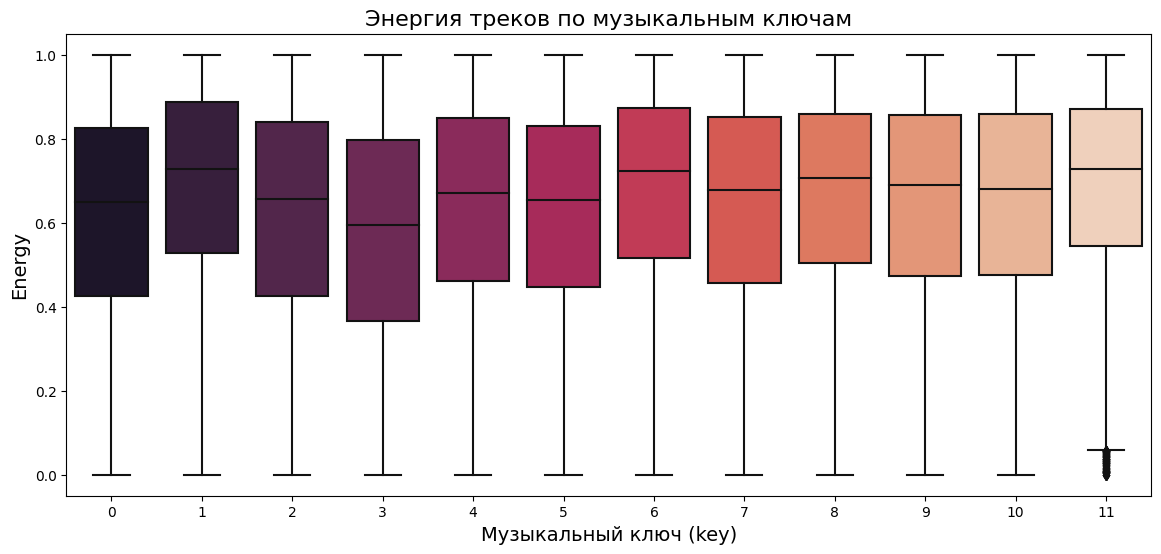

In [77]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='key', y='energy', palette='rocket')
plt.title('Энергия треков по музыкальным ключам', fontsize=16)
plt.xlabel('Музыкальный ключ (key)', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.show()



#в этом графике я протестировал гипотезу что энергичность песни связана с тем, в каком музыкальном ключе она была написана.

In [78]:
#вывод после диаграммы: гипотеза не подтвердилась, практически равномерное распределение по всем музыкальным ключам

In [79]:
import numpy as np
#инструменты для валидации и выбора лучшей модели
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
#методы препроцессинга и нормализации
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
#ансамбли
from sklearn.ensemble import RandomForestRegressor
#метрики, используемые для валидации модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, r2_score
#линейные модели
from sklearn.linear_model import LinearRegression
#деревья решений
from sklearn.tree import DecisionTreeRegressor
#реализация градиентного бустинга для задачи регрессии xgboost
from xgboost import XGBRegressor


In [80]:
#начинаем преобразование фич для дальнейшего использования в моделях.
#1. удалим заведомо лишние столбцы, которые сложно обработать
df_model = df.drop(['album_name', 'track_name'], axis=1) 

In [81]:
#2. фичи track_genre, artists нам важны, но в первую очередь, для большинства моделей, нужно преобразовать категориальные данные
#one-hot encoding здесь не сработает, поскольку данных слишком много, и модель не может их обработать
#применим другой метод преобразования категориальных данных: K-Fold Target Encoding
#основная идея такова:
#Разбиваем датасет на K фолдов (подвыборок).
#Для каждого фолда выделяем его как валидационную часть, а остальные (K-1) фолдов - как обучающую.
#На обучающей части считаем среднее целевой переменной по категориям.
#Применяем это среднее к валидационному фолду.
#Соединяем результаты, получаем колонку со средними значениями, рассчитанными без утечки целевого значения из текущего фолда.

In [82]:
#здесь реализация алгоритма target_encoding
#рассчитываем числовое значение переменной в зависимости от среднего значения таргета и от смещения
# добавляем сглаживание smooth
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cat_cols = ['artists', 'track_genre']

df_encoded = df_model.copy()

for col in cat_cols:
    encoded_col = np.zeros(df_encoded.shape[0])
    global_mean = df_encoded['popularity'].mean()

    for train_idx, val_idx in kf.split(df_encoded):
        train_data = df_encoded.iloc[train_idx]
        val_data = df_encoded.iloc[val_idx]

        alpha = 10
        cat_stats = train_data.groupby(col)['popularity'].agg(['mean', 'count'])
        cat_stats['mean_smooth'] = (cat_stats['mean'] * cat_stats['count'] + global_mean * alpha) / (cat_stats['count'] + alpha)
        mapping = cat_stats['mean_smooth'].to_dict()
        encoded_col[val_idx] = val_data[col].map(mapping).fillna(global_mean)
    df_encoded[col + '_target_enc'] = encoded_col

        
        

In [83]:
#после того как получили преобразованные столбцы, удалим старые из нашей таблицы

In [84]:
df_encoded = df_encoded.drop(['artists', 'track_genre'], axis=1)


In [85]:
df_encoded = df_encoded.drop(['duration_readable'], axis=1)

In [86]:
df_encoded = df_encoded.drop(['valence_bin'], axis=1)

In [87]:
#вытащим из данных целевую фичу - popularity
#и проведем нормализацию при помощи метода StandardScaler
X = df_encoded.drop('popularity', axis=1)
y = df_encoded['popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [88]:
# функция, которая рассчитает для ML модели наиболее популярные регрессионные метрики
def evaluate_model_cv(model, X, y, cv):
    predictions = cross_val_predict(model, X, y, cv=cv)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    rmse = mean_squared_error(y, predictions, squared=False)
    r2 = r2_score(y, predictions)
    return mse, mae, rmse, r2
    

In [89]:
#заведем scorer который пройдется по базовым моделям и запишит их метрики
scorer = make_scorer(mean_squared_error, greater_is_better=False)

#вначале попробуем обучить наши данные на простых моделях, по одной от каждого семейства: линейная регрессия, дерево решений, градиентный бустинг, случайный лес
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(),
}
#для каждого типа модели проведем кросс-валидацию из 5 фолдов
results = {}
kfModels = KFold(n_splits=5, shuffle=True, random_state=42)


#и рассчитаем среднюю ошибку для каждой модели
for name, model in models.items():
    print(f"Evaluating {name} ...")
    mse, mae, rmse, r2 = evaluate_model_cv(model, X_scaled, y, cv=kfModels)
    results[name] = {'MSE': mse, 'MAE':mae, 'RMSE':rmse, 'R^2':r2}


#выведем общий рейтинг
results_df = pd.DataFrame(results).T
print("\nрезультаты кросс-валидации")
print(results_df)

#и получим информацию о том, какая из классических моделей лучше всего справляется с задачей
best_model = results_df["MSE"].idxmin()
print(f"\nBest model: {best_model} with mean MSE = {results_df.loc[best_model, 'MSE']:.2f}")


Evaluating Linear Regression ...
Evaluating Decision Tree ...
Evaluating XGBoost ...

результаты кросс-валидации
                          MSE        MAE       RMSE       R^2
Linear Regression  258.357569  11.637692  16.073505  0.480695
Decision Tree      378.067019  11.720664  19.443946  0.240077
XGBoost            206.386244   9.620245  14.366149  0.585159

Best model: XGBoost with mean MSE = 206.39


In [90]:
#из всех моделей самой эффективной оказалась модель градиентного бустинга, с MSE=206

In [91]:
#теперь попробуем обучить наши данные на нейросети с использованием keras
#подгрузим необходимые модули
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [92]:
#напишем полносвязную нейросеть с использованием Sequential
X_features = X.copy()
y_targets = y.copy()
#добавляем слой нормализации
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_features))
print(normalizer.mean.numpy())

[[ 8.5500747e-02  5.6680065e-01  6.4138329e-01  5.3091254e+00
  -8.2589502e+00  6.3755822e-01  8.4652327e-02  3.1490678e-01
   1.5605092e-01  2.1355405e-01  4.7406596e-01  1.2214770e+02
   3.9040341e+00  3.8005192e+00  3.2261673e+01  3.3241386e+01]]


In [93]:
#функция создания и компиляции модели
#в качестве функции потерь используется MAE, в качестве оптимизатора взял Adam
#добавил два средних слоя, по 64 нейронов, также слой нормализации и выходной слой
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [94]:
#создаем модель
spotify_dnn_model = build_and_compile_model(normalizer)

In [95]:
#и посмотрим суммарную по ней информацию
spotify_dnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ ?                      │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [96]:
history = spotify_dnn_model.fit(
    X_features,
    y_targets,
    validation_split=0.2,
    verbose=1,
    epochs=50
)

Epoch 1/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 14.4387 - val_loss: 10.0428
Epoch 2/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 10.6095 - val_loss: 10.2087
Epoch 3/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 10.1922 - val_loss: 9.8702
Epoch 4/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.9974 - val_loss: 9.7810
Epoch 5/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.9235 - val_loss: 9.7679
Epoch 6/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.9202 - val_loss: 9.7587
Epoch 7/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.8211 - val_loss: 9.7893
Epoch 8/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.7365 - val_loss: 9.8144
Epoch 9/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.7472 - val_loss: 9.8394
Epoch 10/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.6949 - val_loss: 9.7775
Epoch 11/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.7198 - val_loss: 9.8273
Epoch 12/50
2850/2850 ━━━

In [97]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [popularity]')
  plt.legend()
  plt.grid(True)

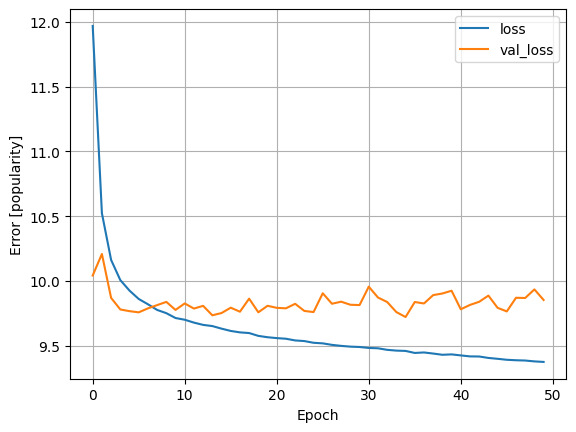

In [98]:
plot_loss(history)

In [99]:
#получили такой первоначальный результат на нейросети, проведем несколько оптимизаций, Loss достаточно высок, и в целом по графику видно, что на валидационной выборке все плохо


In [100]:
#я использовал следющие оптимизации для того, чтобы уменьшить Loss
#1. добавил регуляризаторы к линейным слоям
#2. добавил слои Dropout и BatchNormalization которые помогут справиться с переобучением
#3. уменьшил learning_rate
def build_optimized_model():

    regularizer = tf.keras.regularizers.l2(0.001)

    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
    return model

    

In [101]:
#добавим также раннюю остановку для предотвращения переобучения наших данных
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

Epoch 1/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 21.3423 - val_loss: 10.4807
Epoch 2/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 11.2944 - val_loss: 10.2292
Epoch 3/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.9793 - val_loss: 10.1652
Epoch 4/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.9299 - val_loss: 10.1178
Epoch 5/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.8147 - val_loss: 10.0697
Epoch 6/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.7805 - val_loss: 10.0354
Epoch 7/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.7814 - val_loss: 9.9957
Epoch 8/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.6718 - val_loss: 9.9836
Epoch 9/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.7330 - val_loss: 10.0686
Epoch 10/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.7211 - val_loss: 10.0486
Epoch 11/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 10.5849 - val_loss: 9.9286
Epoch 12/5

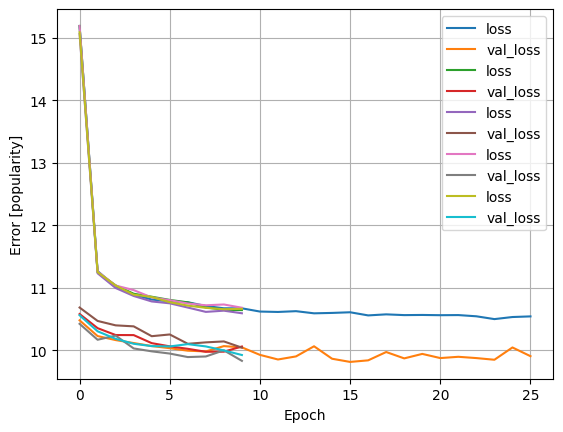

In [102]:
#проведем кросс-валидацию на нашей последней оптимизированной модели
DNN_fold = KFold(n_splits=5, shuffle=True, random_state=42)
val_losses = []

for train_index, val_index in DNN_fold.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index] 


    scalerDnn = StandardScaler()
    X_train_scaled = scalerDnn.fit_transform(X_train)
    X_val_scaled = scalerDnn.transform(X_val)

    model = build_optimized_model();
    history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
             epochs=50,
             callbacks=[early_stopping])
    
    plot_loss(history)
    
    val_loss = model.evaluate(X_val_scaled, y_val)
    val_losses.append(val_loss)
print("Validation losses on each fold:", val_losses)
print("Mean validation loss:", np.mean(val_losses))

In [103]:
#исходя из графика мы получили более плавное изменение loss, тем самым эта модель намного лучше предыдущей, поскольку в этой нет переобучения, и она адекватно работает почти на каждой валидационной выборке.

In [104]:
#финальный вывод по работе, после проведенного анализа и feature engineering, поэкспериментировав с размными классами моделей и их гиперпараметрами, а также после экспериментов с обработкой данных, такая как
# различная нормализация, я пришел к последней модели полносвязной нейронной сети, которая лучше всего должна справиться с поставленной задачей